# Your First Machine Learning Project in Python Step-By-Step

><small><i>from the book 
"Machine Learning Mastery With Python: Understand Your Data, Create Accurate Models and Work Projects End-To-End"
by Jason Brownlee, Migrated to Jupyter with additions by Mitch Sanders 2017</i></small>




You need to see how all of the pieces of a predictive modeling machine learning project actually
fit together. In this lesson you will complete your first machine learning project using Python.
In this step-by-step tutorial project you will:

- Download and install Python SciPy and get the most useful package for machine learning
in Python.
- Load a dataset and understand it’s structure using statistical summaries and data visualization.
- Create 6 machine learning models, pick the best and build confidence that the accuracy is
reliable.

If you are a machine learning beginner and looking to finally get started using Python, this
tutorial was designed for you. Let’s get started!

## The Hello World of Machine Learning
The best small project to start with on a new tool is the classification of iris flowers. This is a
good dataset for your first project because it is so well understood.
- Attributes are numeric so you do not have to figure out how to load and handle data.
- It is a classification problem, allowing you to practice with an easier type of supervised
learning algorithm.
- It is a multiclass classification problem (multi-nominal) that may require some specialized
handling.
- It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and
a screen or single sheet of paper).
- All of the numeric attributes are in the same units and the same scale not requiring any
special scaling or transforms to get started

In this tutorial we are going to work through a small machine learning project end-to-end.
Here is an overview of what we are going to cover:
1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

Take your time and work through each step. Try to type in the commands yourself or
copy-and-paste the commands to speed things up. Start your Python interactive environment
and let’s get started with your hello world machine learning project in Python.


## Load The Data
In this step we are going to load the libraries and the iris data CSV file from URL.
### Import libraries
First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

In [1]:
# Load libraries
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


Everything should load without error. If you have an error, stop. You need a working SciPy
environment before continuing. Go back to the first lessons about setting up your environment.
### Load Dataset
The iris dataset can be downloaded from the UCI Machine Learning repository . We are using
Pandas to load the data. We will also use Pandas next to explore the data both with descriptive statistics and data visualization. Note that we are specifying the names of each column when
loading the data. This will help later when we explore the data.

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
# Load dataset
filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)


## Summarize the Dataset
Now it is time to take a look at the data. In this step we are going to take a look at the data a
few different ways:
- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.

Don’t worry, each look at the data is one command. These are useful commands that you
can use again and again on future projects.

### Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the
data contains with the shape property.


In [4]:
# shape
print(dataset.shape)

(150, 5)


### Peek at the Data
It is also always a good idea to actually eyeball your data.


In [5]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

### Statistical Summary
Now we can take a look at a summary of each attribute. This includes the count, mean, the
min and max values as well as some percentiles.


In [6]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


We can see that all of the numerical values have the same scale (centimeters) and similar
ranges between 0 and 8 centimeters.


### Class Distribution
Let’s take a look at the number of instances (rows) that belong to each class. We can view this
as an absolute count.

In [7]:
# class distribution
print(dataset.groupby('class').size())


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


We can see that each class has the same number of instances (50 or 33% of the dataset).

## Data Visualization
We now have a basic idea about the data. We need to extend this with some visualizations. We
are going to look at two types of plots:
- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.

### Univariate Plots
We will start with some univariate plots, that is, plots of each individual variable. Given that
the input variables are numeric, we can create box and whisker plots of each.

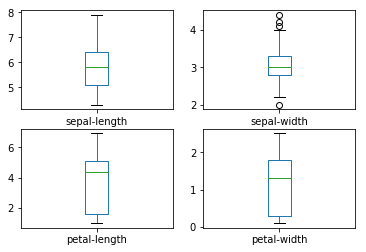

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()


We can also create a histogram of each input variable to get an idea of the distribution.

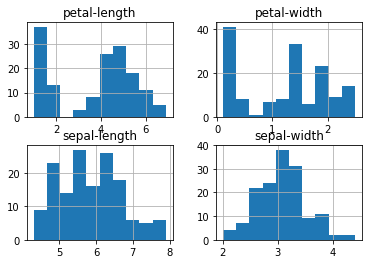

In [9]:
# histograms
dataset.hist()
pyplot.show()


### Multivariate Plots
Now we can look at the interactions between the variables. Let’s look at scatter plots of all
pairs of attributes. This can be helpful to spot structured relationships between input variables.

Visualize the dataset using scatter plots.

C:\Users\mitch_sanders\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


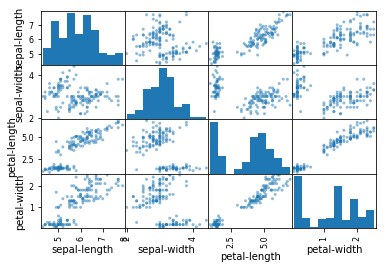

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
# note on deprecated


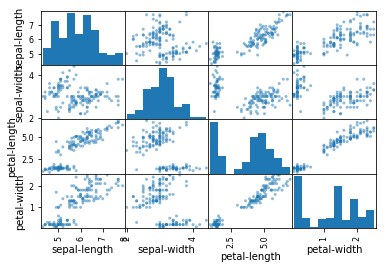

In [24]:
from pandas.plotting import scatter_matrix
# correction from prior deprecation
scatter_matrix(dataset)
pyplot.show()

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and
a predictable relationship.

## Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

### Create a Validation Dataset
We need to know whether or not the model that we created is any good. Later, we will use
statistical methods to estimate the accuracy of the models that we create on unseen data.
We also want a more concrete estimate of the accuracy of the best model on unseen data by
evaluating it on actual unseen data. That is, we are going to hold back some data that the
algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be. We will split the loaded dataset into two, 80%
of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [17]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

You now have training data in the X train and Y train for preparing models and a
X validation and Y validation sets that we can use later.
### Test Harness
We will use 10-fold cross-validation to estimate accuracy. This will split our dataset into 10
parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. We are using
the metric of accuracy to evaluate models. This is a ratio of the number of correctly predicted
instances divided by the total number of instances in the dataset multiplied by 100 to give a
percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and
evaluate each model next.
### Build Models
We don’t know which algorithms would be good on this problem or what configurations to use.
We get an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let’s evaluate six different algorithms:
- Logistic Regression (LR).
- Linear Discriminant Analysis (LDA).
- k-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB
and SVM) algorithms. We reset the random number seed before each run to ensure that the
evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable. Let’s build and evaluate our five models:

In [20]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


## Select The Best Model
We now have 6 models and accuracy estimations for each. We need to compare the models to
each other and select the most accurate. Running the example above, we get the following raw
results:

We can see that it looks like KNN has the largest estimated accuracy score. We can also
create a plot of the model evaluation results and compare the spread and the mean accuracy
of each model. There is a population of accuracy measures for each algorithm because each
algorithm was evaluated 10 times (10 fold cross-validation).

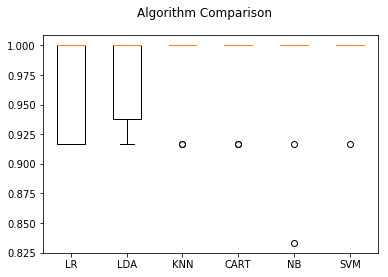

In [21]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Make Predictions
The KNN algorithm was the most accurate model that we tested. Now we want to get an idea
of the accuracy of the model on our validation dataset. This will give us an independent final
check on the accuracy of the best model. It is important to keep a validation set just in case
you made a slip during training, such as overfitting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the KNN model directly on the validation
set and summarize the results as a final accuracy score, a confusion matrix and a classification
report.

In [22]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of
the three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset
was small).

## Summary
In this lesson you discovered step-by-step how to complete your first machine learning project
in Python. You discovered that completing a small end-to-end project from loading the data to
making predictions is the best way to get familiar with the platform.
### Next Step
You have applied the lessons from Part II on a simple problem and completed your first machine
learning project. Next you will take things one step further and work through a regression
predictive modeling problem. It will be a slightly more complex project and involve data
transforms, algorithm tuning and use of ensemble methods to improve results.

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

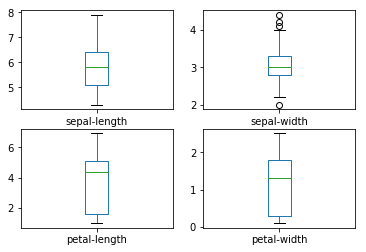

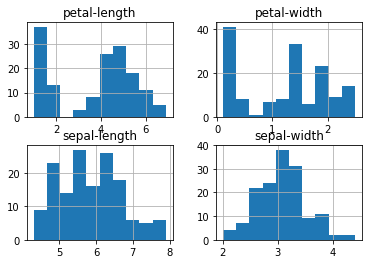

C:\Users\mitch_sanders\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:49: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


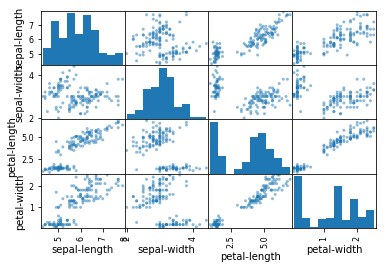

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


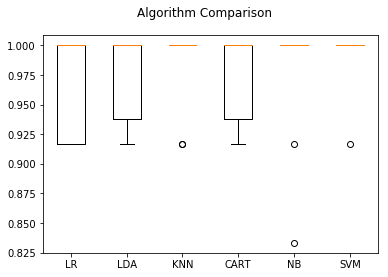

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [25]:
# the full code 
# Hello World Classification: Iris flowers prediction

# Prepare Problem

# Load libraries
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset
filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)

# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

# Data visualizations

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()
# histograms
dataset.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
